In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import

In [3]:
datafile = '../data/prepped_data_whole.csv'

In [4]:
df = pd.read_csv(datafile)

In [5]:
df.head()

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,brewery_Örebro Brygghus,brewery_ØL,brewery_ØLKYMISTEN,brewery_Ølgaard,brewery_Ølhuset Drømmer & Divan,brewery_Ølsmia,brewery_Ørbæk Bryggeri,brewery_Švyturys,brewery_Žatecký pivovar,user_rating
0,tnt,Society & Solitude #7,8.0,45.552157,4.38,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
1,tnt,Riwaka Single Hop Pale Ale,5.2,45.552157,4.14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.00
2,tnt,"Walk, Don't Run",3.7,45.552157,4.10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.50
3,tnt,Czech Two,4.1,39.000000,3.81,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
4,tnt,Spirit of Revolt,8.2,52.000000,3.82,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00


In [50]:
df.shape

(24982, 3088)

## Global Rating

In [6]:
x = df.iloc[:,2:-1]
x.drop(['global_rating', 'total'], axis=1, inplace=True)
x.head()

,ABV,IBU,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,beertype_Barleywine - American,beertype_Barleywine - English,beertype_Barleywine - Other,beertype_Belgian Blonde,...,brewery_Ölvisholt Brewery,brewery_Örebro Brygghus,brewery_ØL,brewery_ØLKYMISTEN,brewery_Ølgaard,brewery_Ølhuset Drømmer & Divan,brewery_Ølsmia,brewery_Ørbæk Bryggeri,brewery_Švyturys,brewery_Žatecký pivovar
0,8.0,45.552157,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.2,45.552157,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.7,45.552157,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,39.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.2,52.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y = df['global_rating']
y.head()

0    4.38
1    4.14
2    4.10
3    3.81
4    3.82
Name: global_rating, dtype: float64

## Scale ABV, IBU, and Global Rating

In [8]:
from sklearn.preprocessing import StandardScaler

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AEC530860>]],
      dtype=object)

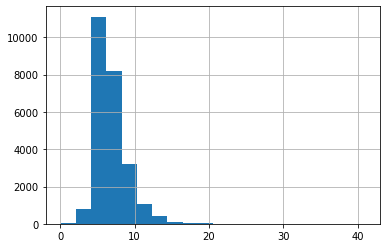

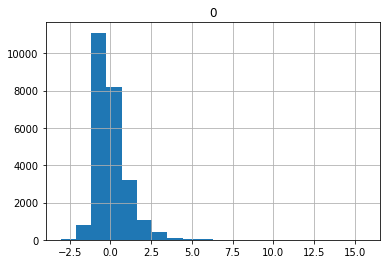

In [9]:
x['ABV'].hist(bins=20)

abv = np.array(x['ABV']).reshape(-1,1)

abv_scaler = StandardScaler()
abv_scaler.fit(abv)
abv_scaled = abv_scaler.transform(abv)

pd.DataFrame(abv_scaled).hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AFFF17978>]],
      dtype=object)

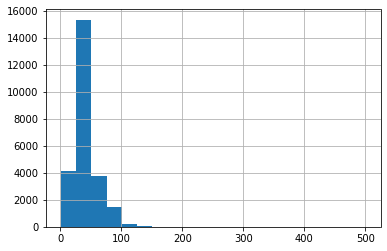

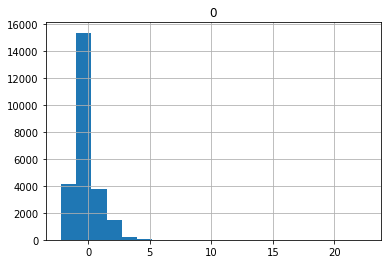

In [10]:
x['IBU'].hist(bins=20)

ibu = np.array(x['IBU']).reshape(-1,1)

ibu_scaler = StandardScaler()
ibu_scaler.fit(ibu)
ibu_scaled = ibu_scaler.transform(ibu)

pd.DataFrame(ibu_scaled).hist(bins=20)

In [11]:
x['ABV'] = abv_scaled
x['IBU'] = ibu_scaled

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AFFA80EB8>]],
      dtype=object)

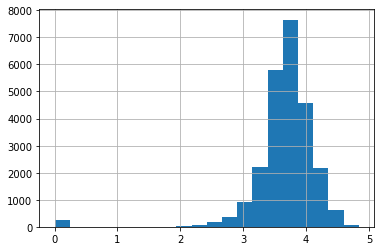

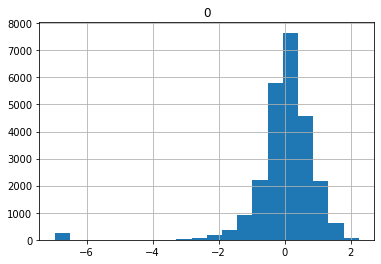

In [12]:
y.hist(bins=20)

y = np.array(y).reshape(-1,1)

y_scaler = StandardScaler()
y_scaler.fit(y)
y_scaled = y_scaler.transform(y)

y = y_scaled

pd.DataFrame(y).hist(bins=20)

## Split and Fit Multiple Models

In [13]:
y = y_scaled.reshape(-len(y_scaled),)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [15]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(fit_intercept=False, normalize=False, cv=5, random_state=12)

In [16]:
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=False,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=12, selection='cyclic',
        tol=0.0001, verbose=False)

In [17]:
lasso_cv.score(X_test, y_test)

0.4814243825552539

In [18]:
lasso_cv.alpha_

0.00040907025803997197

In [19]:
lasso_cv.mse_path_

array([[1.0321839 , 0.97867794, 0.96171254, 1.03990732, 0.9536397 ],
       [1.01504572, 0.95897188, 0.9409593 , 1.01918819, 0.93232043],
       [0.99356768, 0.94187585, 0.92283869, 1.0000363 , 0.91374976],
       [0.97502112, 0.92704698, 0.90701256, 0.98330966, 0.89757161],
       [0.95901518, 0.91418725, 0.89318648, 0.96869705, 0.88347611],
       [0.94521053, 0.90303763, 0.88110407, 0.95592747, 0.87119366],
       [0.93331261, 0.89337302, 0.87054207, 0.94476493, 0.86048964],
       [0.92306572, 0.88499777, 0.86130604, 0.9350039 , 0.85115991],
       [0.91424799, 0.8777419 , 0.85322663, 0.92646536, 0.8430268 ],
       [0.90666692, 0.87145769, 0.84615631, 0.91899337, 0.83593571],
       [0.90015547, 0.86601677, 0.83996656, 0.9124521 , 0.82975208],
       [0.89456879, 0.86130765, 0.8345454 , 0.90672318, 0.82435881],
       [0.88978127, 0.85723345, 0.82979527, 0.90170347, 0.81965395],
       [0.88568399, 0.85371001, 0.82563112, 0.89730309, 0.8155488 ],
       [0.88218256, 0.85066425, 0.

In [20]:
lasso_cv.alphas_

array([4.09070258e-01, 3.81500292e-01, 3.55788449e-01, 3.31809498e-01,
       3.09446649e-01, 2.88590980e-01, 2.69140914e-01, 2.51001717e-01,
       2.34085042e-01, 2.18308493e-01, 2.03595231e-01, 1.89873594e-01,
       1.77076749e-01, 1.65142369e-01, 1.54012326e-01, 1.43632411e-01,
       1.33952067e-01, 1.24924146e-01, 1.16504677e-01, 1.08652651e-01,
       1.01329826e-01, 9.45005353e-02, 8.81315155e-02, 8.21917463e-02,
       7.66522977e-02, 7.14861894e-02, 6.66682594e-02, 6.21750419e-02,
       5.79846522e-02, 5.40766807e-02, 5.04320934e-02, 4.70331391e-02,
       4.38632629e-02, 4.09070258e-02, 3.81500292e-02, 3.55788449e-02,
       3.31809498e-02, 3.09446649e-02, 2.88590980e-02, 2.69140914e-02,
       2.51001717e-02, 2.34085042e-02, 2.18308493e-02, 2.03595231e-02,
       1.89873594e-02, 1.77076749e-02, 1.65142369e-02, 1.54012326e-02,
       1.43632411e-02, 1.33952067e-02, 1.24924146e-02, 1.16504677e-02,
       1.08652651e-02, 1.01329826e-02, 9.45005353e-03, 8.81315155e-03,
      

In [21]:
# pd.DataFrame(lasso_cv.coef_).sort_values(by=0,ascending=False), 
pd.merge(pd.DataFrame(x.columns), pd.DataFrame(lasso_cv.coef_), left_index=True, right_index=True).sort_values('0_y', ascending=False)

,0_x,0_y
2836,brewery_Tree House Brewing Company,1.082576
1528,brewery_Hill Farmstead Brewery,0.976990
258,brewery_Afterthought Brewing Company,0.961229
2840,brewery_Trillium Brewing Company,0.830625
614,brewery_Brasserie Cantillon,0.787002
2711,brewery_The Alchemist,0.750502
2713,brewery_The Answer,0.743705
710,brewery_Brouwerij 3 Fonteinen,0.618424
4,beertype_American Wild Ale,0.588372
1881,brewery_Maine Beer Company,0.583115


In [22]:
print("num of coefs forced to 0 =", sum(lasso_cv.coef_ == 0))

num of coefs forced to 0 = 2844


In [23]:
print("% of coefs forced to 0 =", 100* sum(lasso_cv.coef_ == 0)/len(lasso_cv.coef_))

% of coefs forced to 0 = 92.24781057411612


In [25]:
y_predict = lasso_cv.predict(X_test)

y_test = y_scaler.inverse_transform(y_test)
y_predict = y_scaler.inverse_transform(y_predict)

results_df = pd.DataFrame([y_test, y_predict]).transpose()
results_df.columns = ['y_test', 'y_predict']

results_df['error'] = results_df['y_test'] - results_df['y_predict']
results_df['abs_error'] =abs(results_df['error'])

In [26]:
results_df.head()

,y_test,y_predict,error,abs_error
0,3.48,3.733708,-0.253708,0.253708
1,3.71,3.566509,0.143491,0.143491
2,3.72,3.883523,-0.163523,0.163523
3,3.48,3.605216,-0.125216,0.125216
4,3.75,3.786579,-0.036579,0.036579


''

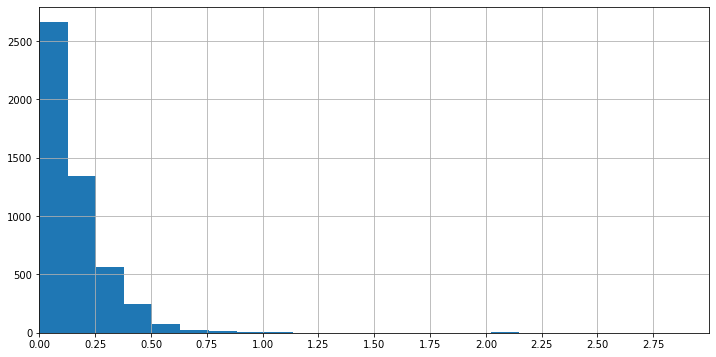

In [27]:
plt.figure(figsize=(12,6))

plt.hist(results_df['abs_error'], bins=33)
plt.xlim(0,3)
plt.xticks(ticks=(np.arange(0, 3, step=0.25)))
plt.grid()
;

''

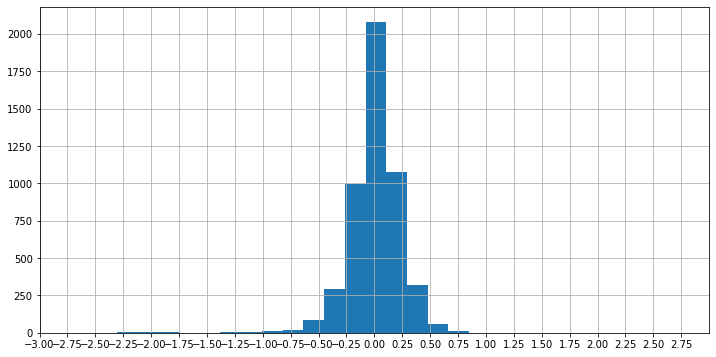

In [39]:
plt.figure(figsize=(12,6))

plt.hist(results_df['error'], bins=42)
plt.xlim(-3,3)
plt.xticks(ticks=(np.arange(-3, 3, step=0.25)))
plt.grid()
;

In [91]:
# Performance Metrics 

print("% of points with less than 0.25 absolute error", 100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
print("% of points with less than 0.50 absolute error", 100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))

mse = np.mean(results_df['error']**2)
print('\n')
print('MSE =', mse)
print('RMSE =', np.sqrt(mse))

mae = np.mean(results_df['abs_error'])
print('\n')
print('MAE =', mae)
print('RMAE =', np.sqrt(mae))

% of points with less than 0.25 absolute error 80.00800480288173
% of points with less than 0.50 absolute error 96.31779067440465


MSE = 0.14618203122583684
RMSE = 0.3823375880368511


MAE = 0.18393083157838552
RMAE = 0.4288715793549224


## Test Performance on My Data - See if Taste Preference is there

In [71]:
my_data = df[df['username'] == 'tsharp93']
my_data

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,brewery_Örebro Brygghus,brewery_ØL,brewery_ØLKYMISTEN,brewery_Ølgaard,brewery_Ølhuset Drømmer & Divan,brewery_Ølsmia,brewery_Ørbæk Bryggeri,brewery_Švyturys,brewery_Žatecký pivovar,user_rating
24957,tsharp93,Firestone Lager,4.5,17.000000,3.58,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.50
24958,tsharp93,Köstritzer Schwarzbier,4.8,22.000000,3.53,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.25
24959,tsharp93,Midas Touch,9.0,12.000000,3.78,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.25
24960,tsharp93,Twisted Monkey,5.8,15.000000,3.46,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00
24961,tsharp93,Fresh Squeezed IPA,6.4,60.000000,3.94,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
24962,tsharp93,Head High,6.6,80.000000,3.97,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.50
24963,tsharp93,Sig Sour 6.5,6.5,45.000000,3.58,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.50
24964,tsharp93,The Drongo,6.5,45.552157,3.54,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
24965,tsharp93,Forbidden Planet,8.4,115.000000,3.67,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.50
24966,tsharp93,They Both Melt,5.6,45.552157,3.57,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.25


In [83]:
my_data_x = my_data.iloc[:,2:-1]
my_data_x.drop(['global_rating', 'total'], axis=1, inplace=True)
my_data_y = my_data['user_rating']

In [84]:
my_data_x.head()

,ABV,IBU,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,beertype_Barleywine - American,beertype_Barleywine - English,beertype_Barleywine - Other,beertype_Belgian Blonde,...,brewery_Ölvisholt Brewery,brewery_Örebro Brygghus,brewery_ØL,brewery_ØLKYMISTEN,brewery_Ølgaard,brewery_Ølhuset Drømmer & Divan,brewery_Ølsmia,brewery_Ørbæk Bryggeri,brewery_Švyturys,brewery_Žatecký pivovar
24957,4.5,17.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24958,4.8,22.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24959,9.0,12.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24960,5.8,15.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24961,6.4,60.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
my_data_y.head()

24957    3.50
24958    3.25
24959    3.25
24960    4.00
24961    4.25
Name: user_rating, dtype: float64

In [86]:
my_abv = np.array(my_data_x['ABV']).reshape(-1,1)
my_ibu = np.array(my_data_x['IBU']).reshape(-1,1)


my_abv_scaled = abv_scaler.transform(my_abv)
my_ibu_scaled = abv_scaler.transform(my_ibu)

my_data_x['ABV'] = my_abv_scaled
my_data_x['IBU'] = my_ibu_scaled

In [87]:
my_predictions = lasso_cv.predict(my_data_x)
my_predictions = y_scaler.inverse_transform(my_predictions)

In [88]:
len(my_predictions)

25

In [89]:
my_results_df = pd.DataFrame([my_predictions, my_data_y]).transpose()
my_results_df.columns = ['predictions', 'actual']
my_results_df

,predictions,actual
0,3.569000,3.50
1,3.541352,3.25
2,3.822497,3.25
3,3.540618,4.00
4,3.762471,4.25
5,3.783818,3.50
6,3.853876,4.50
7,3.854476,4.25
8,4.017175,4.50
9,3.589032,3.25


In [92]:
my_results_df['error'] = my_results_df['predictions'] - my_results_df['actual']
my_results_df['abs_error'] = abs(my_results_df['error'])

In [94]:
# Performance Metrics 

print("% of points with less than 0.25 absolute error", 100*len(my_results_df[my_results_df['abs_error']<=0.25])/len(my_results_df))
print("% of points with less than 0.50 absolute error", 100*len(my_results_df[my_results_df['abs_error']<=0.50])/len(my_results_df))

mse = np.mean(my_results_df['error']**2)
print('\n')
print('MSE =', mse)
print('RMSE =', np.sqrt(mse))

mae = np.mean(my_results_df['abs_error'])
print('\n')
print('MAE =', mae)
print('RMAE =', np.sqrt(mae))

% of points with less than 0.25 absolute error 32.0
% of points with less than 0.50 absolute error 84.0


MSE = 0.16128418792784951
RMSE = 0.4016020267974871


MAE = 0.3455797936724247
RMAE = 0.5878603521861503
